In [ ]:
#importation bibliotheque
#manipulation des donnees en fichier .mcv
import pandas as pd
#Matplotlib.pyplot permet de créer des graphiques à partir de données brutes pour mieux comprendre les tendances et les relations entre les variables.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Declaration des bibliotheques

In [ ]:
#impoter le dataset
data=pd.read_csv('/content/drive/MyDrive/devoir_fouille_Donnees/data_devoir_bon.csv')
data1=pd.read_csv('/content/drive/MyDrive/devoir_fouille_Donnees/data_devoir_bon.csv')
df=pd.read_csv('/content/drive/MyDrive/devoir_fouille_Donnees/data_devoir_bon.csv')


Importer notre fichier data depuis le driver grace a la bibliotheque:

*   **from google.colab import drive**
*  **drive.mount('/content/drive') **



# **Analyses descriptives univariees**

Visualisation des variables de notre jeu de donnees

In [ ]:
data

,nom_voiture,type_carburant,aspiration,empattement,Lon_car,Lar_car,poids_a_vide,enginesize,peakrpm,prix_car
0,alfa-romero giulia,gas,std,88.6,168.8,64.1,2548.0,130.0,5000.0,13495.0
1,alfa-romero stelvio,gas,std,88.6,168.8,64.1,2548.0,130.0,5000.0,16500.0
2,alfa-romero Quadrifoglio,gas,std,94.5,171.2,65.5,2823.0,152.0,5000.0,16500.0
3,audi 100 ls,gas,std,99.8,176.6,66.2,2337.0,109.0,5500.0,13950.0
4,audi 100ls,gas,std,99.4,176.6,66.4,2824.0,136.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...,...
394,saab 99le,gas,std,99.1,186.6,66.5,2695.0,121.0,5250.0,12170.0
395,saab 99le,gas,std,99.1,186.6,66.5,2707.0,121.0,5250.0,15040.0
396,saab 99gle,gas,std,99.1,186.6,66.5,2758.0,121.0,5250.0,15510.0
397,saab 99gle,gas,turbo,99.1,186.6,66.5,2808.0,121.0,5500.0,18150.0


**Verification des donnees manquantes**

In [ ]:
data.isnull().sum()

nom_voiture       0
type_carburant    0
aspiration        0
empattement       0
Lon_car           0
Lar_car           0
poids_a_vide      0
enginesize        0
peakrpm           0
prix_car          0
dtype: int64

### **Description des variables qualitatives de notre jeux de donnee:**

***Nombres d'individus et variables presentes dans notre jeu de donnees***

In [ ]:
data.shape

(399, 10)

*   **Nombres d'individus:** 399.
*   **Nombres de variables du jeu donnees:** 10.

In [ ]:
data.describe()

,empattement,Lon_car,Lar_car,poids_a_vide,enginesize,peakrpm,prix_car
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,98.726065,174.405990,72.114486,2422.365664,129.105138,4882.372757,12816.092165
std,6.288721,12.743224,26.589219,739.976565,43.353282,1202.258187,8783.731776
min,86.600000,141.100000,60.300000,184.100000,61.000000,184.100000,184.110000
25%,94.500000,166.300000,64.000000,2026.000000,97.000000,4800.000000,7295.000000
50%,96.500000,173.200000,65.500000,2395.000000,120.000000,5100.000000,9895.000000
75%,101.200000,184.700000,67.200000,2824.000000,151.000000,5500.000000,16503.000000
max,120.900000,208.100000,184.900000,4066.000000,326.000000,6600.000000,45400.000000


*   **Count**: nombres d'echantillons de notre jeu de donnees.
*   **mean:** Moyenne de chaque variables.
*   **Min**: valeur minimal retrouver dans chaque variable.
*   **max**: valeur maximal retrouver dans chaque variable.
*   **std**: Ecart-type des donnees de chaque variables.




###**Description des variables quantitatives de notre jeux de donnee:**

In [ ]:
data.describe(include='object')

,nom_voiture,type_carburant,aspiration
count,399,399,399
unique,147,2,2
top,peugeot 504,gas,std
freq,18,361,322


Nous pouvons dire que dans nos donnees nous avons 147 marques de voitures differentes et avec comme **marque principale peugeot504**, avec une frequence de 18 voiture par marque.
Parlant du **type de carburant** utilise par les voitures dans notre jeu de donnees, nous avons deux types (gaz et diesel), les voitures utilise plus le gaz avec frequence de 361.

<Axes: >

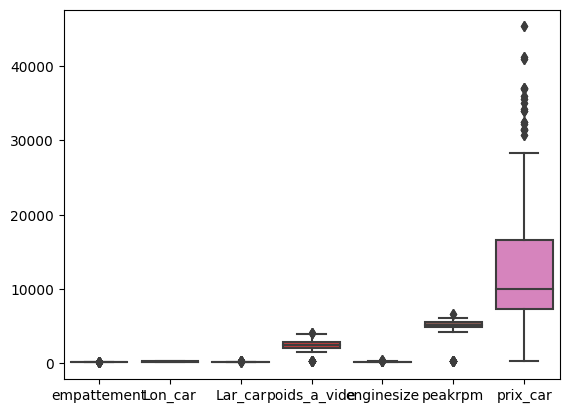

In [ ]:
sns.boxplot(data)

Par ce graphe nous pouvons dire que les prix de voiture sont homogene et varie a plus de 40000.

# **Analyse bivariees**

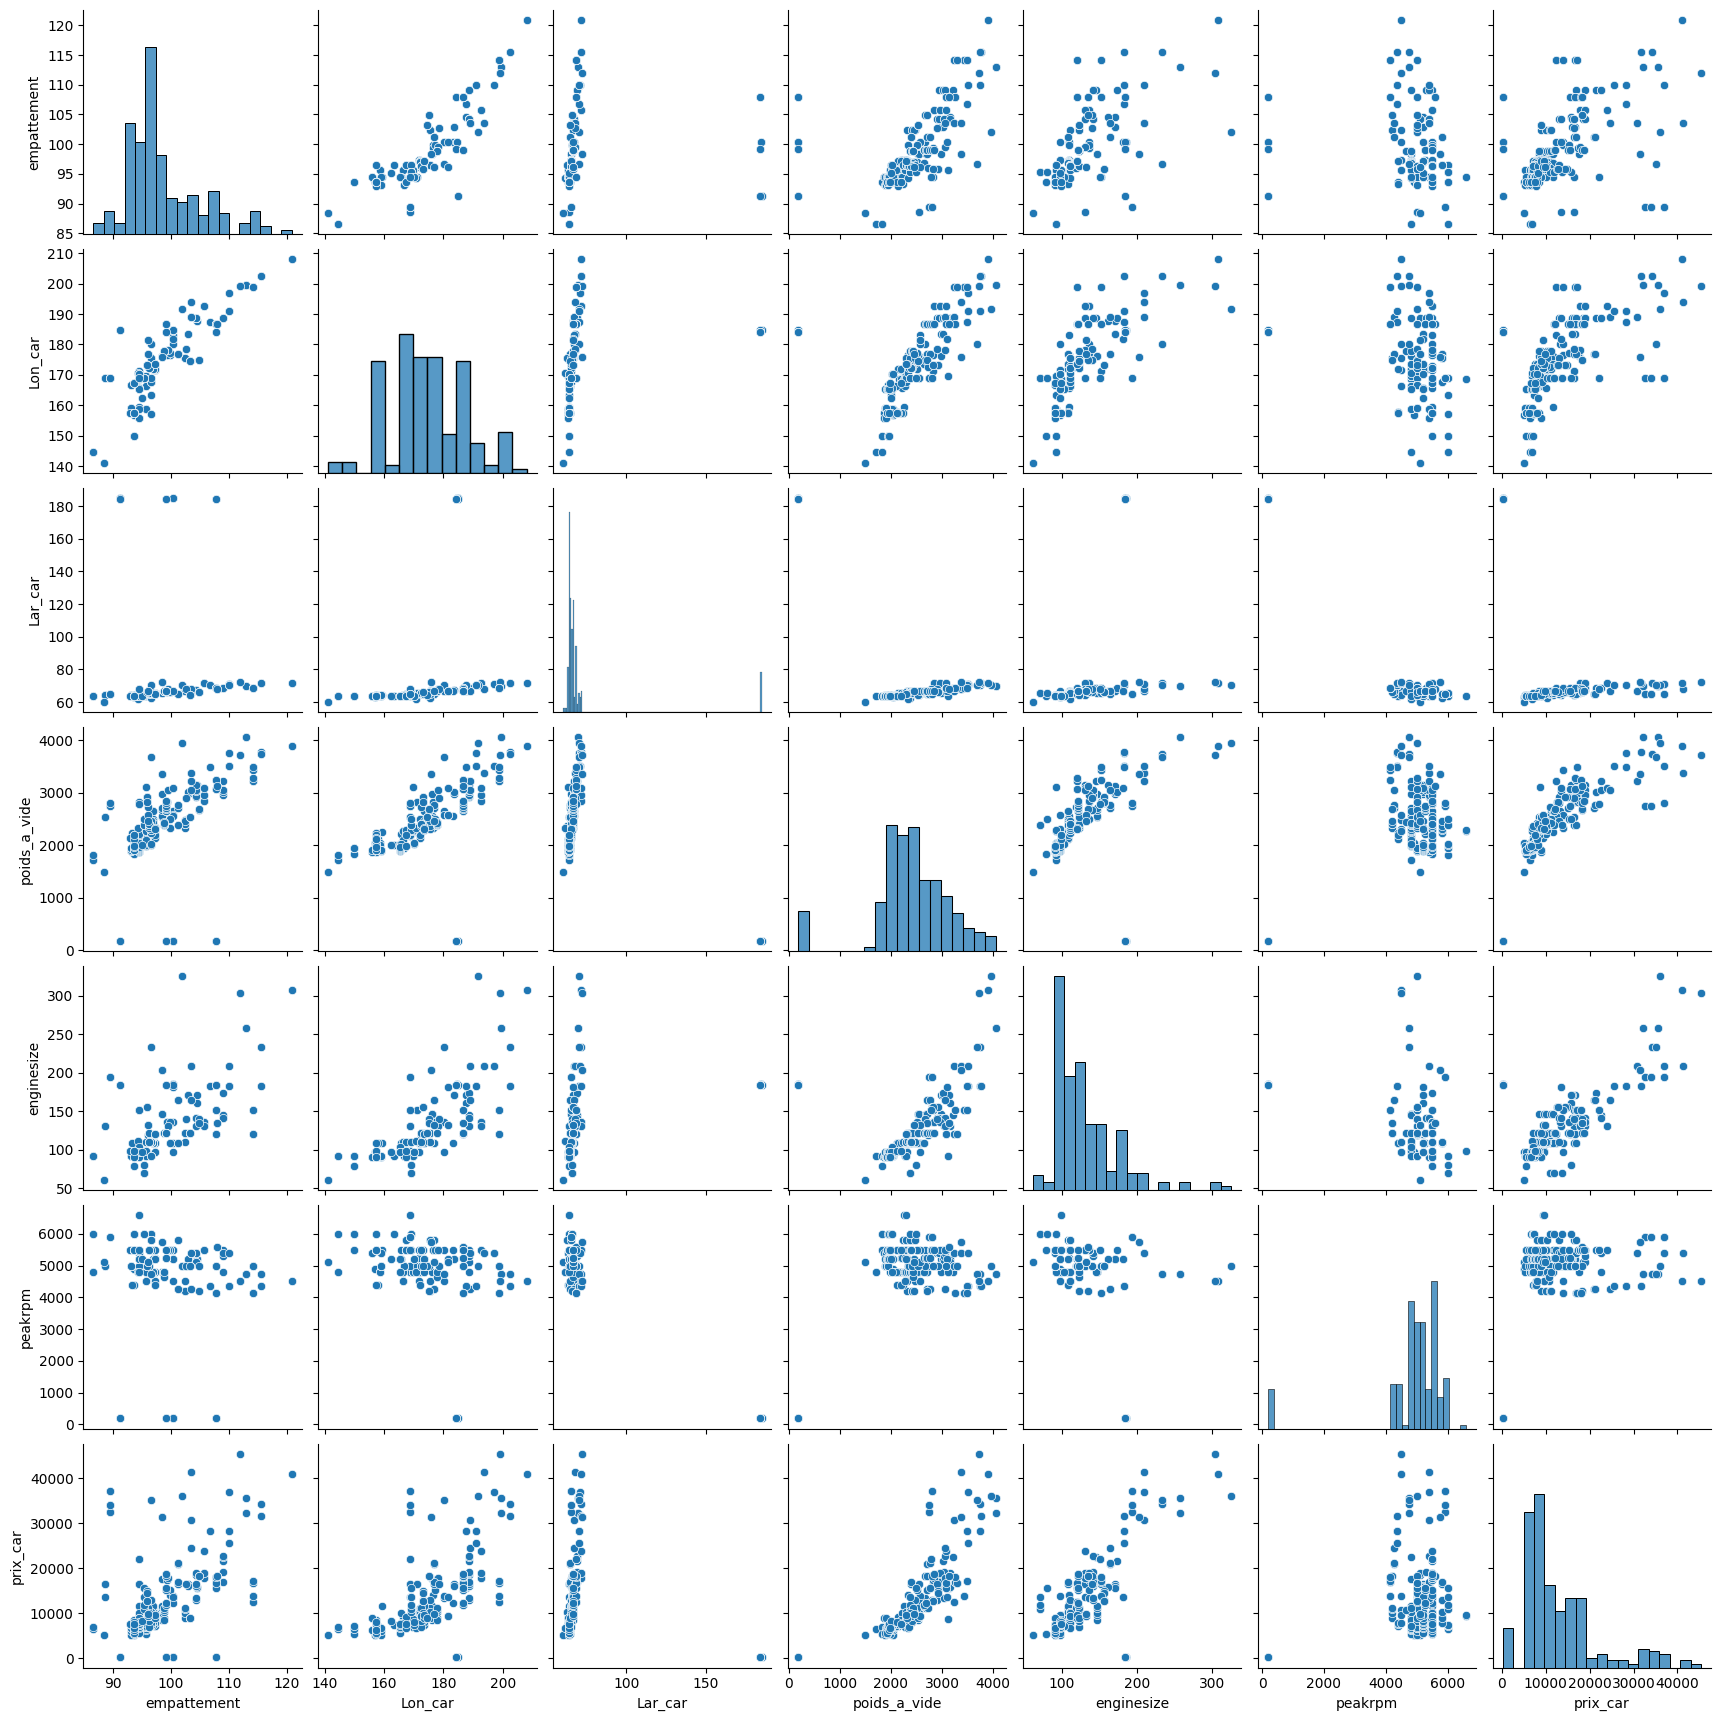

In [ ]:
sns.pairplot(data)

<ipython-input-31-a1f123f663a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr =data.corr()


<Axes: >

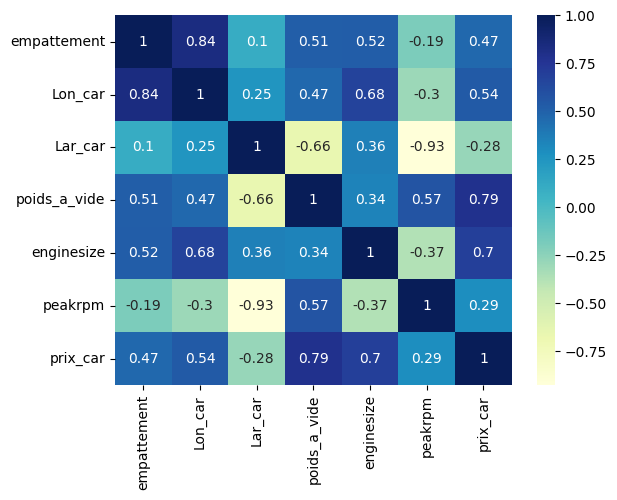

In [ ]:
matrix_corr =data.corr()

sns.heatmap(matrix_corr,annot=True,cmap="YlGnBu")

### Apres cette visualisation, nous faisons une etudes entre les variables "prix_car" et "enginesize" avec une correlation de 0.7

In [ ]:
enginesize=data['enginesize']
prix=data['prix_car']
cor=np.corrcoef(enginesize,prix)
correlation=cor[0,1]
print("la correlation entre la taille moteur (enginesize) et le prix (prix_car) est:",correlation)


la correlation entre la taille moteur (enginesize) et le prix (prix_car) est: 0.6959025479832286


##**Etude de la correlation entre deux variables succeptible d'etre proportionnelle:**

La correlation etant de **0.6959025479832287** entre les variables **"prix_car" **  et  **"enginesize"** indique une corrélation positive modérée et forte entre ces deux variables.
Cela signifie que lorsque la taille du moteur (enginesize) augmente,le prix de la voiture (prix_car) a tendance à augmenter également, et vice versa

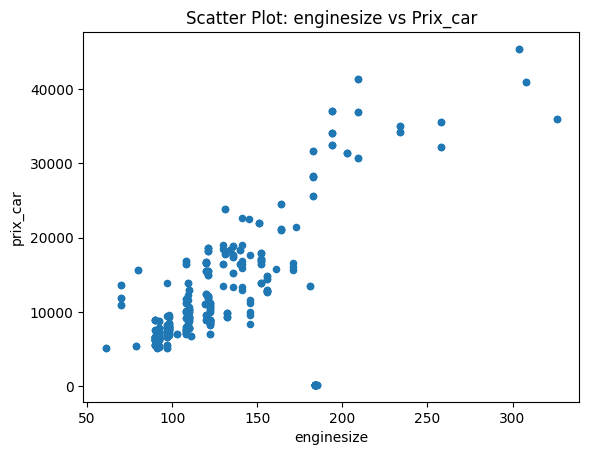

In [ ]:
data.plot.scatter(x='enginesize',y='prix_car')
plt.xlabel('enginesize')
plt.ylabel('prix_car')
plt.title('Scatter Plot: enginesize vs Prix_car')
plt.show()

# **Visualisation**
Le graphe ci-dessus represente la repartition des donnees entre la variable prix_car et la variables enginesize.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nom_voiture     399 non-null    object 
 1   type_carburant  399 non-null    object 
 2   aspiration      399 non-null    object 
 3   empattement     399 non-null    float64
 4   Lon_car         399 non-null    float64
 5   Lar_car         399 non-null    float64
 6   poids_a_vide    399 non-null    float64
 7   enginesize      399 non-null    float64
 8   peakrpm         399 non-null    float64
 9   prix_car        399 non-null    float64
dtypes: float64(7), object(3)
memory usage: 31.3+ KB


In [ ]:
#variable du prix_voiture
var_prix=data['prix_car'].var()
print("la variance du prix des voitures est:",var_prix)

In [ ]:
#variable du enginesize
var_enginesize=data['enginesize'].var()
print("la variance du enginesize des voitures est:",var_enginesize)

In [ ]:
#la covariance entre le prix_car et enginesize:
covariance = data['prix_car'].cov(data['enginesize'])
print(covariance)

# **covariance entre les variables "prix_car" et "enginesize"**
Une covariance de 265002.1953019118 indique une relation linéaire positive entre ces deux variables. Cela signifie que lorsque la taille du moteur (enginesize) augmente,le prix de la voiture (prix_car) a tendance à augmenter également, et vice versa.

In [ ]:
#variance entre le prix_car et enginesize est:
var_prix_eng=covariance/(var_prix*var_enginesize)
print(var_prix_eng)

#**Variance entre les variables "prix_car" et "enginesize"**
Une variance de 1.8274579036517736e-06 entre les variables "prix_car" et "enginesize" indique que les valeurs de ces deux variables sont proches les unes des autres.
Cela signifie que les valeurs de la taille du moteur (enginesize) et du prix de la voiture (prix_car)sont très similaires les unes aux autres, et qu'il y a très peu de variation entre ces valeurs.

In [ ]:
data = data[['prix_car','enginesize']]
data.dropna(axis=0,inplace=True)
data

In [ ]:
y = data['prix_car'].values
X = data['enginesize'].values.reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.score(X, y)
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot (X, predictions, c='r')


In [ ]:
model.fit(X,y)
model.score(X, y)

#**Droite de redression entre la variable prix_car et "enginesize"**
Avec une valeur 0.4842803562895498, donc notre prediction est 48% pas vraiment proche de la realitee, donc la variable "enginesize" n'est pas suffisante pour predire avec exactitude la varition du prix d'une voiture en fonction de la taille de son moteur sur le marche.

#**Analyse Factorielle**

***Dans cette analyse factorielle, le choix de l"ACP est du a la presence des valeurs numerique***

Importation des packages

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline

In [ ]:
from matplotlib.backend_bases import transforms
variables = data1[['empattement','Lon_car','Lar_car','poids_a_vide','enginesize','peakrpm','prix_car']]
variables = np.array(variables)

pca= PCA(n_components=2)


Standardisation des donnees et normalisation

In [ ]:
pca.fit(variables)

transformed=pca.transform(variables)
transformed_arr=np.array(transformed)

print(transformed)

## ***Representation graphique de notre jeu de donnees apres la realisation de notre ACP***

In [ ]:
plt.scatter(transformed[:,0], transformed[:,1])
plt.xlabel("Premier composant principal")
plt.ylabel("Deuxiem composant principal")
colors=['y' if y>0 else 'r' for y in variables[:,1]]

plt.scatter(transformed[:,0], transformed[:,1], c=colors)
plt.show()

Valeur propres de chaque composants

In [ ]:
pca.explained_variance_

Les valeurs propres représentent la quantité de variance expliquée par chaque composante principale. Dans ce cas, la première composante principale (PC1) explique une variance de 77615960.95550239, tandis que la deuxième composante principale (PC2) explique une variance de 1404942.73078752;



Pourcentage des variances expliquer

In [ ]:
pourcentage_variance=pca.explained_variance_ratio_
pourcentage_variance

Presentation graphique

In [ ]:
lab = ['1er composant','2e composant']

# Récupérer les colonnes dans des listes
labels = lab
sizes =  pourcentage_variance

# Afficher le diagramme
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Personnaliser l'apparence
plt.title('Pourcentage de variances')
plt.legend(labels, loc='best')

# Afficher le diagramme
plt.show()

1.   La première composante principale (PC1) capture une grande partie de la variance totale dans les données, soit 98%. Cela indique que PC1 est une composante importante et contient des informations significatives sur la structure des données. La PC1 est responsable de la variation la plus importante dans le jeu de données.

2.  La deuxième composante principale (PC2) capture une quantité relativement faible de variance, seulement 1,8%. Bien que sa contribution à la variance totale soit relativement faible, PC2 peut encore apporter des informations complémentaires à PC1.

3.   En résumé, dans ce jeu de données, PC1 est la composante principale dominante qui explique la majeure partie de la variance, tandis que PC2 représente une variation plus faible mais peut toujours être utile pour l'analyse et la compréhension des données.




## REALISATION DU CERCLE DE CORRELATION

Créer un DataFrame pour les composantes principales

In [ ]:
# Convertir les variables en DataFrame avec les colonnes appropriées
variables = pd.DataFrame(variables, columns=['empattement', 'Lon_car', 'Lar_car', 'poids_a_vide', 'enginesize', 'peakrpm', 'prix_car'])

# Réaliser l'ACP et obtenir les composantes principales
pca = PCA()
transformed = pca.fit_transform(variables)

# Calculer les corrélations entre les variables originales et les composantes principales
correlations = np.corrcoef(variables.T, transformed.T)[:variables.shape[1], variables.shape[1]:]

# Tracer le cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

for i, (var, corr) in enumerate(zip(variables.columns, correlations.T)):
    ax.annotate(var, (corr[0], corr[1]), color='blue', fontsize=8)
    ax.scatter(corr[0], corr[1], color='blue', alpha=0.5)

circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)
ax.set_aspect('equal', adjustable='datalim')

plt.title('Cercle de corrélation')
plt.grid(True)
plt.show()


#**CLASSIFICATION AVEC K-Means**
Premiere methode: nous decidons de fixe le regroupement de donnees en 3 clusters

In [ ]:
from sklearn.cluster import KMeans
# Effectuer le clustering K-means sur les données fromage_cr
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformed)

# Tracer les points avec différentes couleurs selon le clustering
for couleur, k in zip(['red', 'blue', 'lawngreen'], [0, 1, 2]):
    plt.scatter(transformed[kmeans.labels_ == k, 0], transformed[kmeans.labels_ == k, 1], c=couleur)

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('ACP avec couleurs selon le clustering')
plt.show()

Sur ce graphe nous pouvons remarquer la repartion des donnees de facons homogenes en trois clusters definis comme plus haut.

# Methode CAH: Classification Ascendante Hiérarchique

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Chargement des données
data = pd.DataFrame(variables, columns=['empattement', 'Lon_car',
                                        'Lar_car', 'poids_a_vide',
                                        'enginesize', 'peakrpm',
                                        'prix_car'])

# Génération de la matrice des liens
Z = linkage(data, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.title("CAH")
dendrogram(Z, labels=data.index, orientation='left', color_threshold=0)
plt.show()


# **REGRESSION_LINEAIRE_MULTIPLE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prétraitement des données

In [ ]:
# Charger les données depuis un fichier CSV (si elles ne sont pas déjà en mémoire)
data2=pd.read_csv('/content/drive/MyDrive/devoir_fouille_Donnees/data_devoir_bon.csv')

# Sélectionner les colonnes spécifiées
selected_columns = ['nom_voiture', 'type_carburant', 'aspiration', 'empattement', 'Lon_car', 'Lar_car', 'poids_a_vide', 'enginesize', 'peakrpm', 'prix_car']
df_selected =data2[selected_columns]

# Diviser les données en variables explicatives (X) et cible (y)
X = df_selected.drop('prix_car', axis=1)
y = df_selected['prix_car']

# Diviser les données en ensemble d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

In [ ]:
y

# Traitement de donnee

Donnees manquantes

In [ ]:
data2.isnull().sum()

Variable qualitative

In [ ]:
# Sélectionner les colonnes de type objet
categorical_columns = data2.select_dtypes(include=['object']).columns

# Parcourir les colonnes catégorielles et afficher les valeurs uniques pour chaque colonne
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Variable : {col}")
    print(f"Valeurs uniques : {unique_values}")
    print("=" * 30)



In [ ]:
#nombre de donnee de types objects
data2.dtypes.value_counts()

nous avons ici trois variables de types object, que nous devons encoder

# ENCODAGE

In [ ]:
# Prétraitement des variables catégorielles avec OneHotEncoder
categorical_features = ['nom_voiture', 'type_carburant', 'aspiration']
numeric_features = ['empattement', 'Lon_car', 'Lar_car', 'poids_a_vide', 'enginesize', 'peakrpm']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Modelisation

In [ ]:
# ici on cree le pipeline du model de la régression linéaire_multiple
model= Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
model

# procedure d'evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Diviser les données en ensemble d'apprentissage et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner un modèle de régression linéaire multiple
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R² : {r2:.2f}")


Un R² de 0.92 suggère que 92% de la variance totale dans la variable cible peut
être expliquée par les variables explicatives du modèle.

OPTIMISATION

In [ ]:
# Définir les hyperparamètres à ajuster (sans 'normalize')
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")
# Prédiction sur les données de test avec le modèle ajusté
y_pred = grid_search.predict(X_test)

# Évaluer la performance du modèle ajusté
score = grid_search.score(X_test, y_test)
print(f"Score du modèle ajusté : {score:.2f}")

EXEMPLE DE PREDICTION

In [ ]:
# Exemple de prédiction pour de nouvelles données avec le modèle ajusté
new_data = pd.DataFrame({
    'nom_voiture': ['alfa-romero giulia'],
    'type_carburant': ['gas'],
    'aspiration': ['std'],
    'empattement': [100],
    'Lon_car': [200],
    'Lar_car': [150],
    'poids_a_vide': [2500],
    'enginesize': [200],
    'peakrpm': [6000]
})

predicted_price = grid_search.predict(new_data)
print(f"Prédiction du prix de la nouvelle voiture avec le modèle ajusté : {predicted_price[0]:.2f}")


# **Methode SVM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Charger les données depuis un fichier CSV (si elles ne sont pas déjà en mémoire)
df1=pd.read_csv('/content/drive/MyDrive/devoir_fouille_Donnees/data_devoir_bon.csv')

# Sélectionner les colonnes spécifiées
selected_columns = ['nom_voiture', 'type_carburant', 'aspiration', 'empattement', 'Lon_car', 'Lar_car', 'poids_a_vide', 'enginesize', 'peakrpm', 'prix_car']
df_selected = df1[selected_columns]

# Diviser les données en variables explicatives (X) et cible (y)
X = df_selected.drop('prix_car', axis=1)
y = df_selected['prix_car']

# Diviser les données en ensemble d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des variables catégorielles avec OneHotEncoder
categorical_features = ['nom_voiture', 'type_carburant', 'aspiration']
numeric_features = ['empattement', 'Lon_car', 'Lar_car', 'poids_a_vide', 'enginesize', 'peakrpm']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Créer le pipeline avec le prétraitement et le modèle SVR
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR(kernel='linear'))])

# Définir le dictionnaire des hyperparamètres à tester
param_grid = {
    'regressor__C': [0.1, 1.0, 10.0],  # Paramètre C pour SVR
    'regressor__epsilon': [0.1, 0.2, 0.5],  # Paramètre epsilon pour SVR
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Prédiction sur les données de test avec le modèle ajusté
y_pred = grid_search.predict(X_test)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE : {rmse:.2f}")

print(f"MAE : {mae:.2f}")

# Évaluer la performance du modèle ajusté
score = grid_search.score(X_test, y_test)
print(f"Score du modèle ajusté : {score:.2f}")
